# STA130 Homework 04 - Jason Li


## 1.

The standard deviation is simply how much the data varies in a sample. The standard error of the mean tells you, if you were to collect sample data over and over, how close the mean of that sample would be to the mean of the means, or rather how much it varies.

Rather than showing you how much the data varies, it will show you how much the mean of the data varies each time that you survey a sample (or bootstrap samples).

## 2.

The first step is to calculate bootstrapped means by sampling with replacement, and calculate the mean of the means ($mean$) and the standard error of the means ($SEM$), the steps of which are described in the video.

Next, plug the values into the formula to get the 95% confidence interval ($CI$):\
$CI = mean \pm 1.96 \times SEM$.

This formula will give you the lower and upper bounds of the 95% confidence interval.

## 3.

The first step is to calculate bootstrapped means by sampling with replacement, and calculate the mean of each bootstrapped sample (*not* the mean of the means).

Sort these means in ascending order.

Since we want a 95% confidence interval, that leaves 5% outside the interval. Split this 5% into the lower and upper bound.\
Thus, we will take the values at the 2.5th percentile and the 97.5th (100-2.5) percentile as the lower and upper bound.\
We can also think about this as taking the middle 95% of the total 100%, which is from the 2.5th to 97.5th percentile.

## 4.

Below are two functions. One will calculate the bootstrapped means of some data, and the other will calculate the 95% confidence interval, with the steps listed in question 3, using the first function.

I have commented in the code below where to change the code to use a different population parameter, such as the median.

In [1]:
import numpy as np


def get_bootstrapped_means(data, num_bootstrap_samples=10000):
    # Generate bootstrap sample means
    bootstrapped_means = []
    for _ in range(num_bootstrap_samples):
        # Generate a bootstrap sample (resample with replacement)
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        
        
        # Calculate the mean of the bootstrap sample
        # Change this to np.median(...), or np.var(...) or another method to use a different population parameter
        sample_mean = np.mean(bootstrap_sample)
        
        
        bootstrapped_means.append(sample_mean)
    return bootstrapped_means

# Function to generate bootstrapped confidence interval
def bootstrap_confidence_interval(data, confidence_level=95):
    # Generate bootstrap sample means
    bootstrapped_means = get_bootstrapped_means(data)
    
    # Calculate the percentiles for the confidence interval
    lower_percentile = (100 - confidence_level) / 2
    upper_percentile = 100 - lower_percentile
    
    # Compute the confidence interval
    confidence_interval = np.percentile(bootstrapped_means, [lower_percentile, upper_percentile])
    
    return confidence_interval



I want to display a histogram of the sample to help visualize it. Here is a function that will do that. I will run this once the confidence interval is calculated.

In [2]:
import matplotlib.pyplot as plt

# Function to plot histogram and display mean, median, and confidence interval
def plot_bootstrap_histogram(data, confidence_interval):
    
    bootstrapped_means = get_bootstrapped_means(data)
    
    
    # Calculate mean and median of bootstrapped means
    mean_bootstrap = np.mean(bootstrapped_means)
    median_bootstrap = np.median(bootstrapped_means)
    
    # Create the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(bootstrapped_means, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
    
    # Plot mean, median, and confidence interval lines
    plt.axvline(mean_bootstrap, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_bootstrap:.2f}')
    plt.axvline(median_bootstrap, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_bootstrap:.2f}')
    plt.axvline(confidence_interval[0], color='blue', linestyle='-', linewidth=2, label=f'2.5%: {confidence_interval[0]:.2f}')
    plt.axvline(confidence_interval[1], color='blue', linestyle='-', linewidth=2, label=f'97.5%: {confidence_interval[1]:.2f}')
    
    # Add title and labels
    plt.title('Bootstrapped Sample Means Histogram with 95% Confidence Interval', fontsize=16)
    plt.xlabel('Sample Mean', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Add legend
    plt.legend(loc='upper right')
    
    # Show plot
    plt.show()

Generate a sample, and run the bootstrap confidence interval function

In [3]:
# Generate a random sample from a normal distribution
np.random.seed(42)  # Set seed for reproducibility
sample_size = 50
population_mean = 100
population_std = 15
sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)



# Calculate the 95% bootstrap confidence interval
ci = bootstrap_confidence_interval(sample)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci}")

95% Bootstrap Confidence Interval for the Mean: [ 92.75387385 100.45780659]


Show the histogram

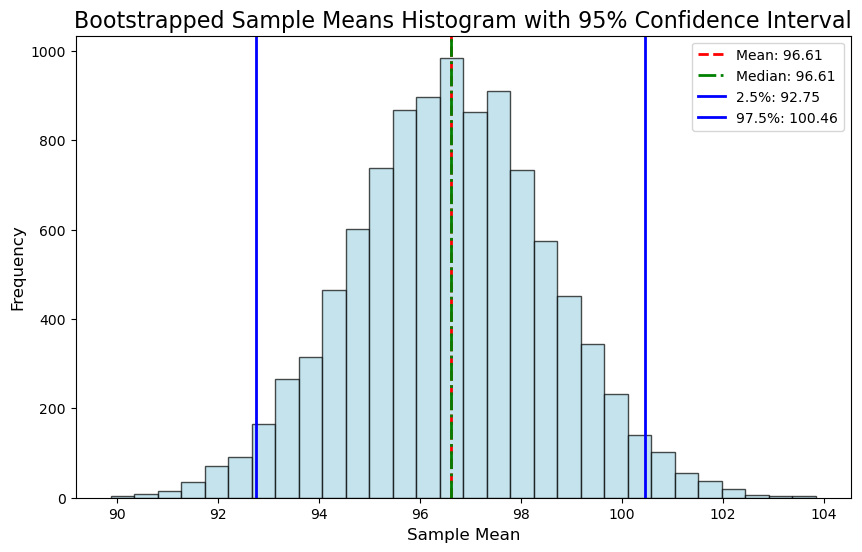

In [4]:
plot_bootstrap_histogram(sample, ci)

## 5.

A population parameter is a fixed constant value that describes a population. This value is generally unknown, since it is often not possible to know a characteristic from each member of a population.

A sample statistic is a value that is calculated from a sample. This can vary from sample to sample, since two samples of a population usually do not have the exact same charateristics. Sample statistics can be used to infer population parameters (or a confidence interval).

It is important to distinguish between these roles because they are different things. Their values can differ, there can be different methods of calculating or estimating these values, and they are used for different purposes.

## 6.

1. Imagine you have a sample. You want to randomly take some amount of data (with replacement, meaning you can pick the same thing more than once) from this sample to form a new sample. This is your bootstrapped sample. The size of this new sample is often the same size as the original. Notice that this new sample will only contain values from the original sample.  You can calculate some statistics from this sample, such as the mean. You can perform this multiple times (like thousands of times or more). You can then take all the means (or any other statistic you calculated) from the many new samples, and calculate the mean of mean (or any other statistic you calculated) to infer a population parameter.

2. The purpose of bootstrapping is to estimate population parameters from just a sample. Rather than looking at one sample that you have, you can bootstrap the sample to create many more samples and look at the values for all the samples.

3. You could bootstrap the sample numerous times, as explained earlier (in part 1). You can take the means of all the bootstrapped samples, which are the mean of the means. This value will give you a value that is much more accurate to the population mean than just using a sample mean. You can compare this value to the hypothesized guess. You can also take the middle some percentile of the bootstrapped sample means to get a confidence interval.

## 7.

The sample mean statistic is only the just the mean of one sample, it does not represent the population. Each sample taken from the population may vary, so just because a sample mean is not zero doesn't tell us much.

The confidence interval for the population mean gives an interval in which the population mean could fall in (with some percentage for the confidence). Since zero falls in the confidence interval for the population mean, it means that zero is a possible value for the population mean. It means that the population average falls somewhere between the interval of which zero is a part of.

To lead to the opposite conclusion, the confidence interval must only include either positive or negative numbers, leaving out zero. This would mean that the drug (on average) is effective or negatively effective respectively.

## 8.


We have a sample of patients, and their health score before and after taking a vaccine. We want to analyze the data to give evidence for whether or not the vaccine is effective.

The sample data is shown below.

In [5]:
import pandas as pd

# Load the CSV file
file_path = 'STA130_HW04_Q8.csv'
df = pd.read_csv(file_path)

df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


I want to create a new column for the change in the patient's health score.

This will be their final health score minus their initial health score.

A positive number indicates that their health improved after getting the vaccine.\
A negative number indicates that their health declined after getting the vaccine.\
A change of zero indicates that their health stayed the same after getting the vaccine.

In [6]:
# Create a new column 'HealthScoreChange' by subtracting InitialHealthScore from FinalHealthScore
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

df

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,HealthScoreChange
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3
5,6,41,F,80,86,6
6,7,33,M,79,86,7
7,8,48,F,85,82,-3
8,9,26,M,76,83,7
9,10,39,F,83,84,1


Here is a visualization of the histogram of this sample. The sample data on its own doesn't give us much.

Mean Health Score Change: 3.3


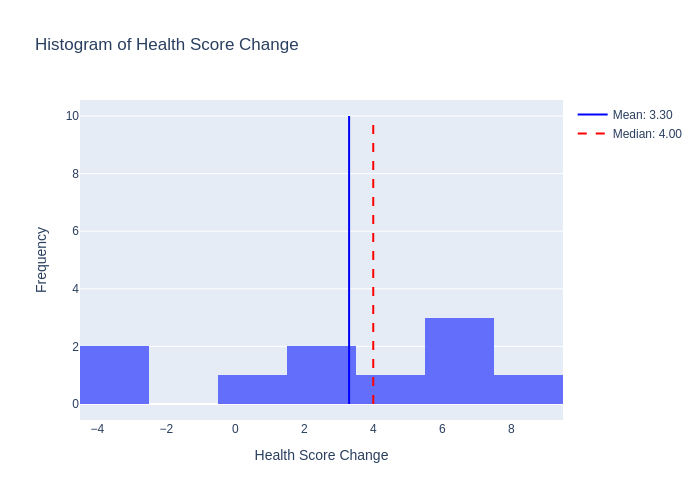

In [7]:
import plotly.express as px
import plotly.graph_objects as go

# Calculate the mean and median of HealthScoreChange
mean_health_change = df['HealthScoreChange'].mean()
median_health_change = df['HealthScoreChange'].median()

print(f"Mean Health Score Change: {mean_health_change}")

# Create a histogram using Plotly
fig = px.histogram(df, x='HealthScoreChange', nbins=6, title='Histogram of Health Score Change')

# Add vertical lines for the mean and median
fig.add_trace(go.Scatter(x=[mean_health_change, mean_health_change], y=[0, df.shape[0]],
                         mode="lines", name=f'Mean: {mean_health_change:.2f}',
                         line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=[median_health_change, median_health_change], y=[0, df.shape[0]],
                         mode="lines", name=f'Median: {median_health_change:.2f}',
                         line=dict(color='red', width=2, dash='dash')))

# Update layout
fig.update_layout(
    xaxis_title='Health Score Change',
    yaxis_title='Frequency',
    showlegend=True
)

# Show the figure
fig.show(renderer="png")


I want to create new samples by take elements from the existing sample at random with replacement. I will simulate this numerous times. I will store the mean of the sample each time I do this. This gives us a list of the bootstrapped means.

I will get a 95% confidence interval for the population mean, using the values at the 2.5th and 97.5th percentiles.

For the vaccine to be effective, I want the confidence interval to only include positive numbers, and not zero. If it includes zero, we cannot rule out the null hypothesis, meaning that zero is a possibility as the population mean for the health score change. I only want positive numbers to be possible values for the population mean.

In [8]:
import numpy as np

# Variables for sample size, number of simulations, and random seed
sample_size = 10
num_simulations = 10000
random_seed = 42  # Set your desired seed

# Set the seed for reproducibility
np.random.seed(random_seed)

# List to store bootstrapped means
bootstrapped_means = []

# Perform bootstrapping
for _ in range(num_simulations):
    # Randomly sample 'sample_size' elements with replacement from the HealthScoreChange column
    bootstrap_sample = df['HealthScoreChange'].sample(n=sample_size, replace=True, random_state=np.random.randint(1, 10000))
    
    # Calculate the mean of the bootstrap sample and store it
    bootstrapped_means.append(bootstrap_sample.mean())

# Display the bootstrapped means
bootstrapped_means[:10]

[2.9, 5.2, 3.3, 2.1, 2.2, 3.5, 3.2, 4.1, 2.1, 2.6]

In [9]:
# Calculate the 95% confidence interval using the percentiles method
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

# Display the confidence interval
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")


95% Confidence Interval: [0.90, 5.60]


In [10]:
# Calculate the mean of the bootstrapped means
mean_of_means = np.mean(bootstrapped_means)

# Display the mean of the means
print(f"Mean of Bootstrapped Means: {mean_of_means:.2f}")


Mean of Bootstrapped Means: 3.30


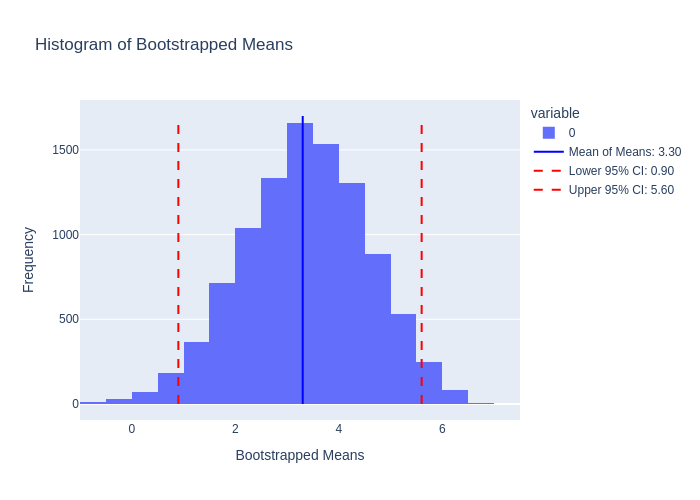

In [11]:
# Create a histogram of the bootstrapped means
fig = px.histogram(bootstrapped_means, nbins=30, title='Histogram of Bootstrapped Means')

# Add vertical lines for the mean of the means and the 95% confidence interval
fig.add_trace(go.Scatter(x=[mean_of_means, mean_of_means], y=[0, 1700], mode="lines", name=f'Mean of Means: {mean_of_means:.2f}',
                         line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=[lower_bound, lower_bound], y=[0, 1700], mode="lines", name=f'Lower 95% CI: {lower_bound:.2f}',
                         line=dict(color='red', width=2, dash='dash')))
fig.add_trace(go.Scatter(x=[upper_bound, upper_bound], y=[0, 1700], mode="lines", name=f'Upper 95% CI: {upper_bound:.2f}',
                         line=dict(color='red', width=2, dash='dash')))

# Update layout
fig.update_layout(
    xaxis_title='Bootstrapped Means',
    yaxis_title='Frequency',
    showlegend=True
)

# Show the figure
fig.show(renderer="png")


We wanted zero to not be included in the confidence interval.

Since zero is not included in the 95% confidence interval, there is evidence to show that the vaccine is effective.